In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import time

138.430997671 60.8595704834 (112, 92)


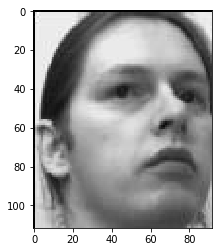

In [2]:
im = Image.open("image/umist_cropped.jpg")
data_orig = np.array(im)

ws = (112,92)
data = data_orig[ws[0]:2*ws[0],ws[1]:ws[1]*2]
print(np.mean(data), np.std(data), data.shape)
plt.imshow(data, cmap='gray')
plt.show()

In [3]:
def gibbs_mask(X, mask, W, I, K, gamma_shape, gamma_scale, max_iter):
    X = X * mask
    A_t = np.ones((W,I))*gamma_shape
    B_t = np.ones((W,I))*gamma_scale
    A_v = np.ones((I,K))*gamma_shape
    B_v = np.ones((I,K))*gamma_scale
    
    T = np.random.gamma(A_t,B_t)
    V = np.random.gamma(A_v,B_v)

    last_time = time.time()
    
    for n in range(max_iter):

        p = np.zeros((W, I ,K))
        S = np.zeros((W, I ,K))

        p = np.einsum("ik,kj->ikj", T, V)
        p = p/np.sum(p, axis = 1, keepdims = True)

        for v in range(W):
            for t in range(K):
                S[v, :, t] = np.random.binomial(X[v,t], p[v, :, t].squeeze())


        alpha_t = A_t + np.sum(S, axis=2)
        beta_t = 1./(B_t + np.einsum("ij, kj->ik", mask, V))
        T = np.random.gamma(alpha_t, beta_t)
        
        alpha_v = A_v + np.sum(S, axis=0)
        beta_v = 1./(B_v + np.einsum("ij, ik->kj", mask, T))
        V = np.random.gamma(alpha_v, beta_v)

        if n % 50 == 0:
            mean_diff = np.mean(np.abs(X - np.dot(T,V)))
            now = time.time()
            diff_time = now - last_time
            print("diff - time: %s -- epoch %d: loss: "% (diff_time, n), mean_diff)
            last_time = now
            
    return T, V

In [4]:
#Initialization
X = data
W = X.shape[0]
K = X.shape[1]
I = 100

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5

gamma_scale = data_variance/data_mean
gamma_shape = data_mean/gamma_scale

mask = np.ones((W,K)).astype(np.uint8)
mask[30:50,35:60] = 0

T_, V_ = gibbs_mask(X, mask, W, I, K, gamma_shape, gamma_scale, 500)

diff - time: 0.35399317741394043 -- epoch 0: loss:  42.2773426276
diff - time: 17.06804585456848 -- epoch 50: loss:  16.9725525034
diff - time: 17.523235082626343 -- epoch 100: loss:  15.2505934272
diff - time: 17.138320922851562 -- epoch 150: loss:  14.6287360132
diff - time: 16.609524965286255 -- epoch 200: loss:  14.206559372
diff - time: 16.2915620803833 -- epoch 250: loss:  14.0762209377
diff - time: 16.82043194770813 -- epoch 300: loss:  13.9251215668
diff - time: 16.98821520805359 -- epoch 350: loss:  13.7231116391
diff - time: 17.852407932281494 -- epoch 400: loss:  13.5676500414
diff - time: 18.337594985961914 -- epoch 450: loss:  13.4614681579


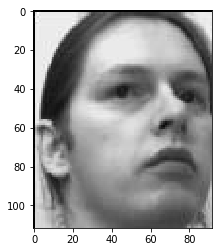

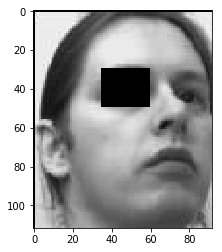

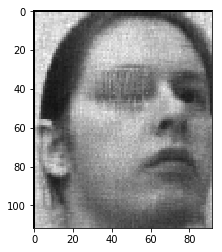

138.430997671 60.8595704834
139.682438995 59.0630328417


In [6]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(X*mask, cmap='gray')
plt.show()
plt.imshow(np.dot(T_,V_), cmap='gray')
plt.show()
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T_,V_)), np.std(np.dot(T_,V_)))

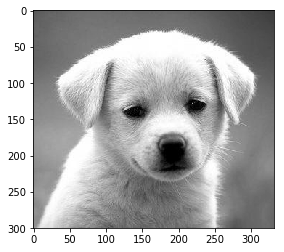

In [7]:
im = Image.open("image/image6.jpg")
data_orig = np.array(im)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
 
data = rgb2gray(data_orig)    
plt.imshow(data, cmap = plt.get_cmap('gray'))
plt.show()

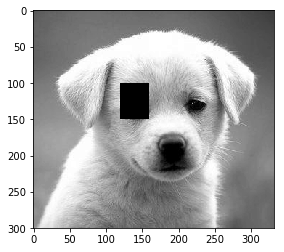

diff - time: 3.3793163299560547 -- epoch 0: loss:  37.7945953523
diff - time: 165.35548782348633 -- epoch 50: loss:  14.6239640211
diff - time: 161.72031998634338 -- epoch 100: loss:  11.5850466066
diff - time: 161.77684688568115 -- epoch 150: loss:  10.7070843566


In [8]:
#Initialization
X = data.astype(np.uint8)
W = X.shape[0]
K = X.shape[1]
I = 100

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5

gamma_scale = data_variance/data_mean
gamma_shape = data_mean/gamma_scale

mask = np.ones((W,K)).astype(np.uint8)
mask[100:150,120:160] = 0
plt.imshow(X*mask, cmap='gray')
plt.show()

T_, V_ = gibbs_mask(X, mask, W, I, K, gamma_shape, gamma_scale, 200)

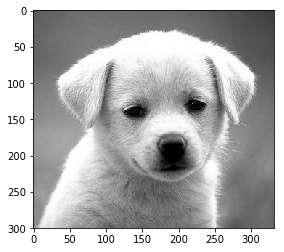

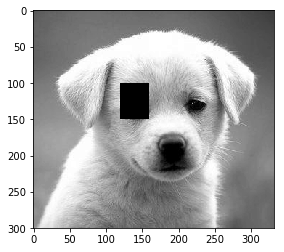

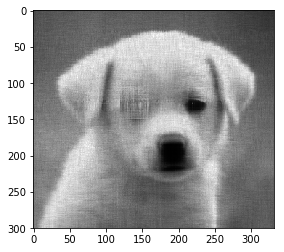

155.46937751 57.0928985274
156.227381846 55.1525552685


In [9]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(X*mask, cmap='gray')
plt.show()
plt.imshow(np.dot(T_,V_), cmap='gray')
plt.show()
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T_,V_)), np.std(np.dot(T_,V_)))

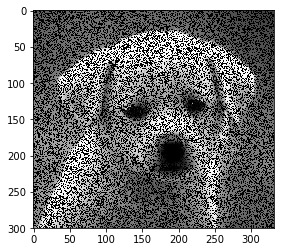

diff - time: 3.543977975845337 -- epoch 0: loss:  83.7738536367
diff - time: 164.7942988872528 -- epoch 50: loss:  69.7354067183
diff - time: 161.2758274078369 -- epoch 100: loss:  68.104291759
diff - time: 163.11864066123962 -- epoch 150: loss:  67.6861428254


In [12]:
#Initialization
X = data.astype(np.uint8)
W = X.shape[0]
K = X.shape[1]
I = 100

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5

gamma_scale = data_variance/data_mean
gamma_shape = data_mean/gamma_scale

pi = 0.60
mask = np.ones((W,K)).astype(np.uint8)
flip = np.random.rand(W,K) < pi
mask = mask * flip
plt.imshow(X*mask, cmap='gray')
plt.show()

T_, V_ = gibbs_mask(X, mask, W, I, K, gamma_shape, gamma_scale, 200)

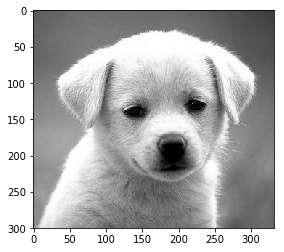

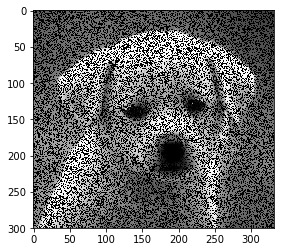

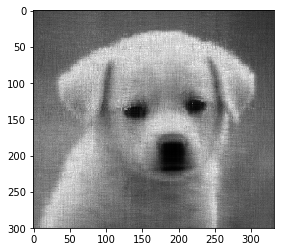

155.46937751 57.0928985274
155.889492512 55.4751371831


In [13]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(X*mask, cmap='gray')
plt.show()
plt.imshow(np.dot(T_,V_), cmap='gray')
plt.show()
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T_,V_)), np.std(np.dot(T_,V_)))